In [16]:
library(Seurat)
library(ggpubr)
library(dplyr)
library(useful)
library(plyr)
library(RColorBrewer)


Attaching package: 'ggpubr'

The following object is masked from 'package:plyr':

    mutate



nCount_RNA nFeature_RNA patient percent.mt FinalCellType
AAACCTGAGAATAGGG.p55 1321.532    768         p55     1.6736612  41BB-Hi CD8  
AAACCTGAGGCTAGGT.p55 1658.375    864         p55     3.5349675  41BB-Hi CD8  
AAACCTGCACTGTGTA.p55 1911.238    982         p55     0.5222296  41BB-Hi CD8  
AAACCTGGTAAATGTG.p55 2690.130   1185         p55     0.8572014  41BB-Lo CD8  
AAACCTGTCAGATAAG.p55 1868.786    872         p55     2.4369866  41BB-Lo CD8  
AAACCTGTCCTGCTTG.p55 1604.849    843         p55     1.8196860  41BB-Lo CD8  
                     ICB_Response ProgExhPheno TermExhPheno
AAACCTGAGAATAGGG.p55 ICB_PR       Not          Not         
AAACCTGAGGCTAGGT.p55 ICB_PR       Not          Not         
AAACCTGCACTGTGTA.p55 ICB_PR       Not          TermExh     
AAACCTGGTAAATGTG.p55 ICB_PR       Not          TermExh     
AAACCTGTCAGATAAG.p55 ICB_PR       Not          Not         
AAACCTGTCCTGCTTG.p55 ICB_PR       Not          Not         
                     Terminally_Exhausted_Sig Progenitor_Exhausted_Sig
AAACCTGAGAATAGGG.p55 2.458432                 0.17772925              
AAACCTGAGGCTAGGT.p55 2.192551                 0.21101681              
AAACCTGCACTGTGTA.p55 2.919220                 0.09795905              
AAACCTGGTAAATGTG.p55 2.791324                 0.23621876              
AAACCTGTCAGATAAG.p55 2.000581                 0.18568887              
AAACCTGTCCTGCTTG.p55 2.118730                 0.14704334

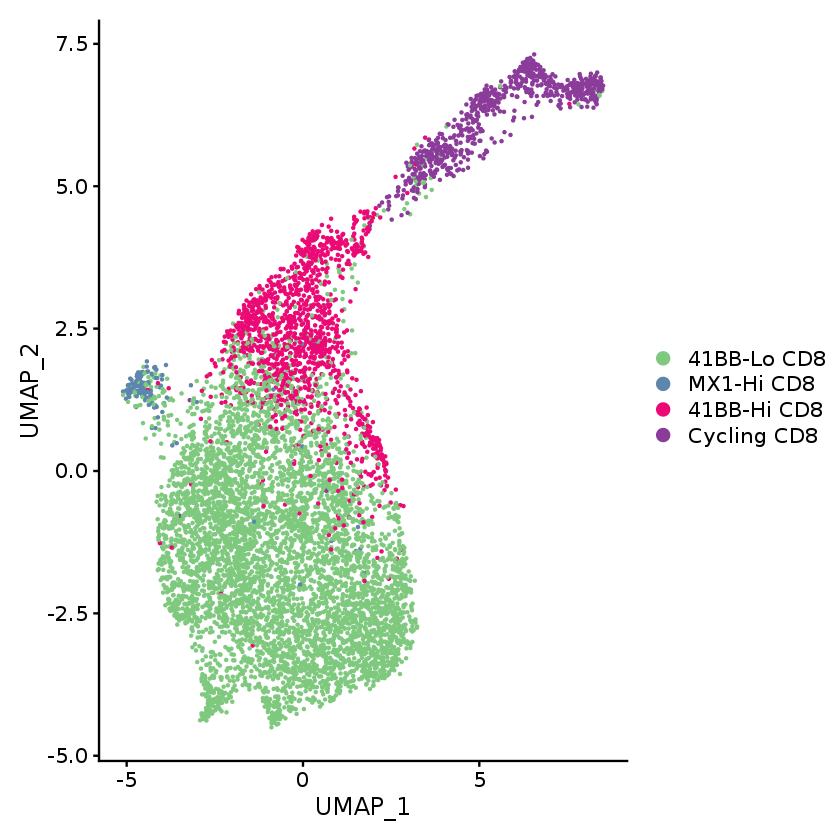

In [10]:
cd8_seurobj <- readRDS("scRCC_CancerCell_ReviewerResponse_CD8s_SeurObj.RDS")
head(cd8_seurobj@meta.data)
umap_cols <- c('#7FC97F','#5C86AB','#EB0A75', '#8B3B99')
DimPlot(cd8_seurobj, cols = umap_cols)

In [11]:
DefaultAssay(cd8_seurobj) <- "RNA"

In [12]:
Idents(cd8_seurobj) <- "patient"

Centering and scaling data matrix
PC_ 1 
Positive:  FTL, RPS18, MT-ND2, MT-ND3, LTB, EEF1A1, MT-CYB, ALOX5AP, PMCH, NEAT1 
	   MT-ATP6, RPS2, PATL2, ERN1, LINC00861, LINC00685, C1orf56, CXCR6, CISH, PIM2 
	   MT1G, CD52, AC133644.2, ITM2C, HOXB-AS1, DUSP6, MAF, AL359220.1, AC058791.1, DUSP1 
Negative:  STMN1, UBE2C, BIRC5, RRM2, TUBA1B, PCLAF, MKI67, CDK1, AURKB, TOP2A 
	   TYMS, ZWINT, TUBB, TUBB4B, CCNA2, ASF1B, NUSAP1, CKS1B, CDCA3, SPC25 
	   CENPA, KIFC1, H2AFX, HIST1H4C, CCNB2, CDKN3, HMGB2, CDCA8, HJURP, CDC20 
PC_ 2 
Positive:  TNFRSF18, PKM, TNFRSF9, NFKBIA, BIRC3, CRTAM, NFKB2, XCL1, GAPDH, HSP90AB1 
	   TPI1, GZMB, ENO1, EBI3, PGAM1, RGS16, BHLHE40-AS1, DUSP2, CTSW, FSTL3 
	   CD82, XCL2, PRF1, HLA-DQA1, CXCL13, SYNGR2, MFSD10, VCAM1, LSP1, HSPB1 
Negative:  CENPA, CCNB2, TOP2A, ASPM, AURKB, CDC20, BIRC5, CDCA3, CCNB1, CENPF 
	   GTSE1, MKI67, PLK1, DLGAP5, CDCA8, HJURP, TROAP, HMMR, CCNA2, UBE2C 
	   PIMREG, NUF2, CENPE, PSRC1, KIF2C, CDK1, HMGB3, NEK2, MXD3, CDKN3 
PC_ 3 


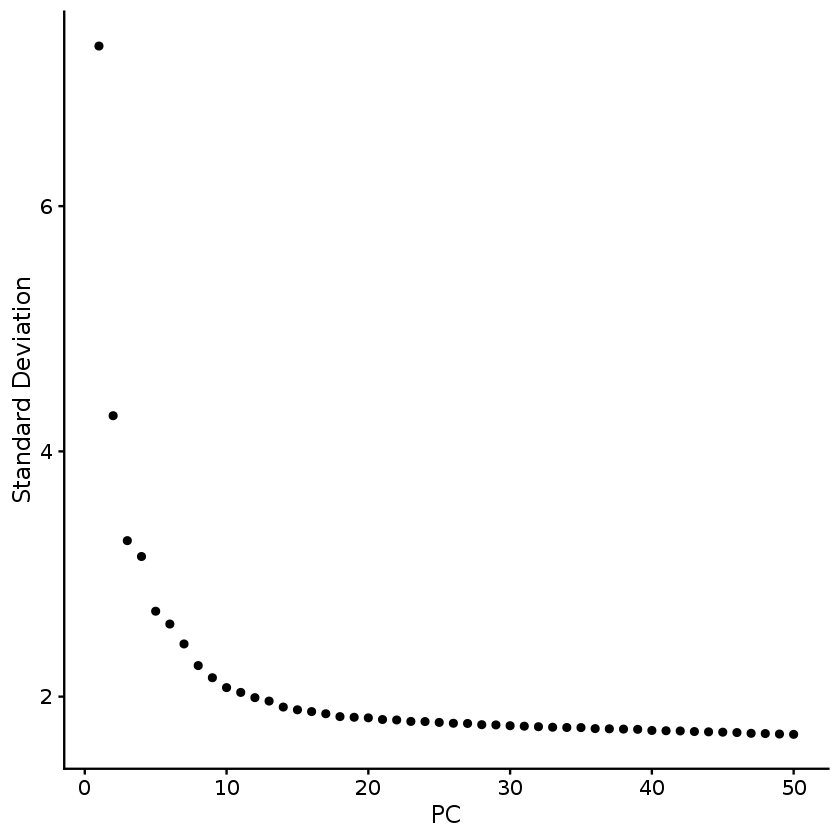

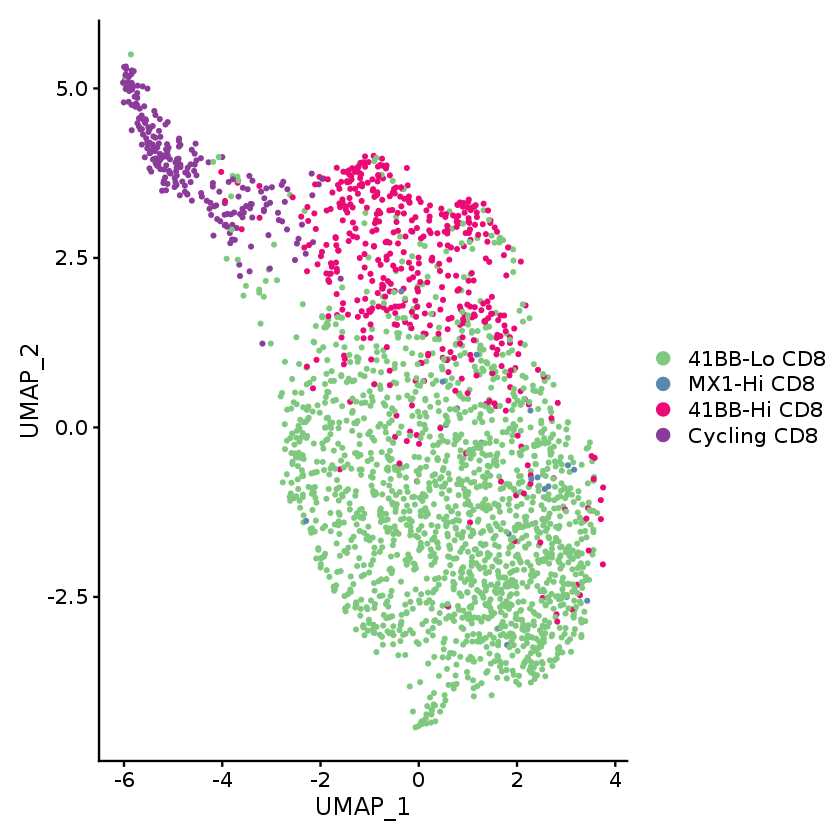

In [14]:
p55 <- subset(cd8_seurobj, idents = c("p55"))

p55 <- FindVariableFeatures(p55, selection.method = "vst")
top10 <- head(VariableFeatures(p55), 10)
all.genes <- rownames(p55)
p55 <- ScaleData(p55, features = all.genes)
p55 <- RunPCA(p55, features = VariableFeatures(object = p55), npcs = 60)
ElbowPlot(p55,ndims = 50)
p55 <- RunUMAP(p55, dims = 1:30)
DimPlot(p55, group.by = "FinalCellType", cols = umap_cols)

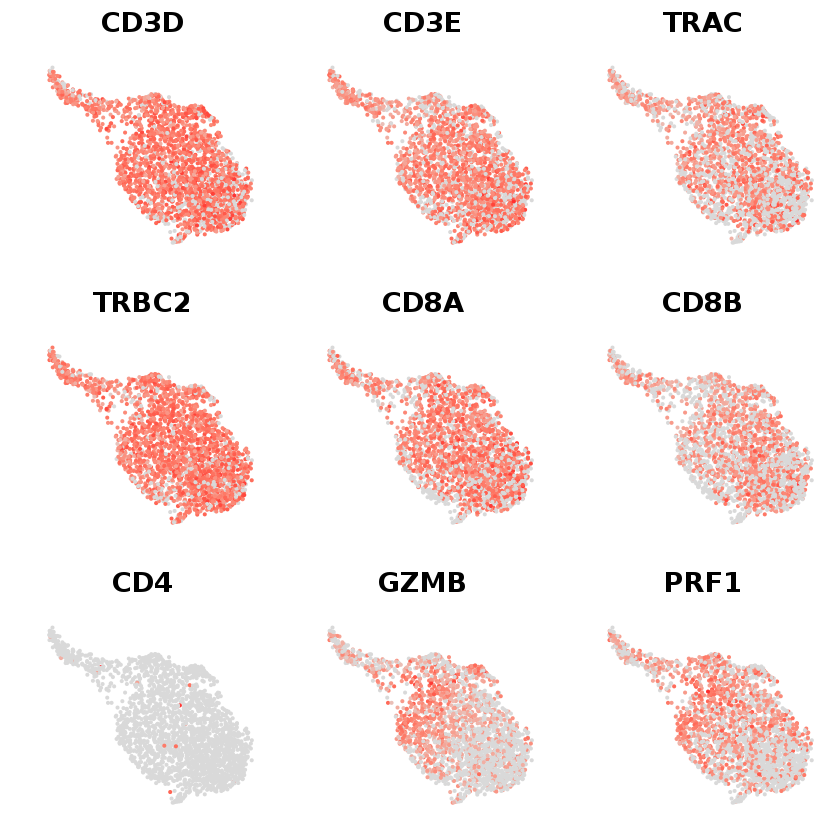

In [91]:
DefaultAssay(p55) <- "RNA"
p <- FeaturePlot(p55, c("CD3D","CD3E","TRAC","TRBC2","CD8A","CD8B","CD4","GZMB","PRF1"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

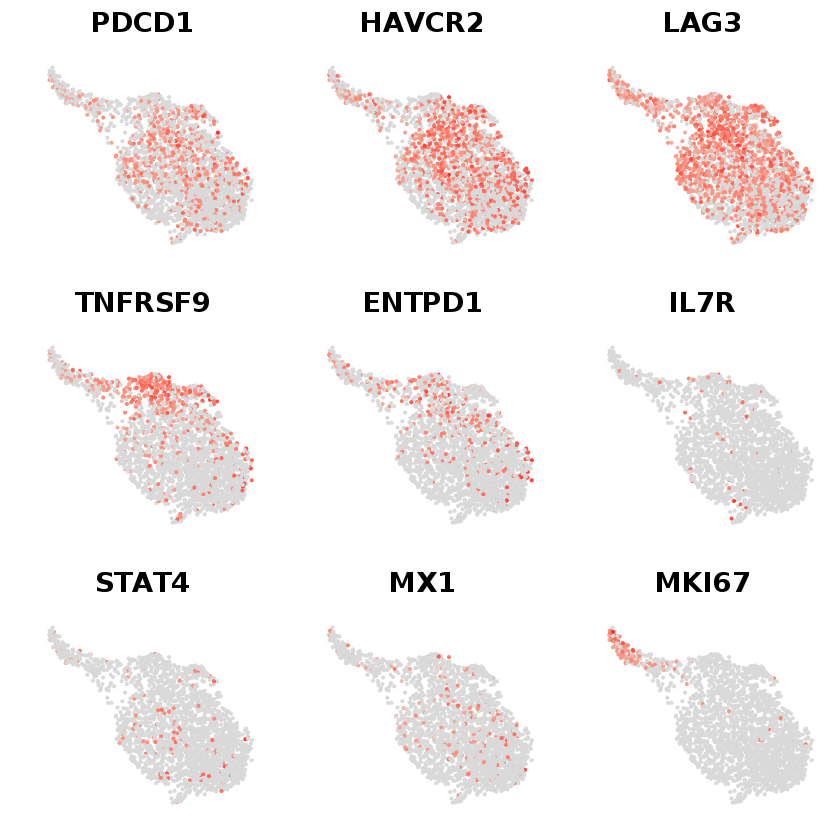

In [92]:
DefaultAssay(p55) <- "RNA"
p <- FeaturePlot(p55, c("PDCD1","HAVCR2","LAG3","TNFRSF9","ENTPD1","IL7R","STAT4","MX1","MKI67"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

In [19]:
umap <- DimPlot(p55, group.by = "FinalCellType", cols = umap_cols, pt.size = 0.4) + NoLegend()

cd3d <- FeaturePlot(p55, c("CD3D"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd8b <- FeaturePlot(p55, c("CD8B"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd4 <- FeaturePlot(p55, c("CD4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd69 <- FeaturePlot(p55, c("CD69"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdcd1 <- FeaturePlot(p55, c("PDCD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
havcr2 <- FeaturePlot(p55, c("HAVCR2"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
lag3 <- FeaturePlot(p55, c("LAG3"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
tnfrsf9 <- FeaturePlot(p55, c("TNFRSF9"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
entpd1 <- FeaturePlot(p55, c("ENTPD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
il7r <- FeaturePlot(p55, c("IL7R"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
stat4 <- FeaturePlot(p55, c("STAT4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mx1 <- FeaturePlot(p55, c("MX1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mki67 <- FeaturePlot(p55, c("MKI67"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdf("p55_RNA_UMAP_Integrated_ClusterMetadata.pdf", useDingbats = F, width = 15, height = 5)
ggarrange(umap, cd3d, cd8b, cd4, cd69, tnfrsf9, pdcd1, havcr2, lag3, entpd1, il7r, stat4, mx1, mki67, nrow = 2, ncol = 7)
dev.off()

png 
  2

Centering and scaling data matrix
PC_ 1 
Positive:  RPS6, RPS18, SAA1, CCL4, RPS23, JUNB, RPL18A, FTL, MT-ND2, APOC1 
	   NPC2, SPP1, TYROBP, C1QC, RPS2, CST3, RPS8, PSAP, IGKC, SAT1 
	   RPL7A, DUSP1, PMCH, ALOX5AP, FCER1G, MT-ND3, GPX1, RPS16, CXCR6, C1QB 
Negative:  UBE2C, STMN1, AURKB, BIRC5, MKI67, TOP2A, PCLAF, TUBA1B, TYMS, GTSE1 
	   RRM2, ZWINT, TUBB, HIST1H4C, CKS1B, CDK1, CCNB2, CDKN3, CENPF, TUBB4B 
	   MXD3, CENPW, CDCA5, CDC20, ASF1B, CCNA2, TK1, SPC25, KIFC1, NUSAP1 
PC_ 2 
Positive:  GINS2, PKM, MCM7, GAPDH, HSP90AB1, DCTPP1, E2F1, PAICS, MCM3, RANBP1 
	   FABP5, TNFRSF9, NME1, MCM5, GNG4, XCL1, PCNA, SOD1, C1QBP, TPI1 
	   MCM4, PGAM1, ATP5MC1, MCM6, PARK7, MCM2, GSTP1, DUT, CDC45, SRM 
Negative:  PLK1, CDC20, CENPA, CCNB2, TROAP, CCNB1, CDCA8, MXD3, TOP2A, UBE2C 
	   CENPF, ASPM, PSRC1, AURKB, GTSE1, KIF2C, PIMREG, DLGAP5, HMMR, BIRC5 
	   NUSAP1, HJURP, KNSTRN, MKI67, NEK2, CDCA3, TPX2, SGO2, CCNA2, NUF2 
PC_ 3 
Positive:  RPS18, PCLAF, RPS16, MCM7, GINS2, TYMS, TK1,

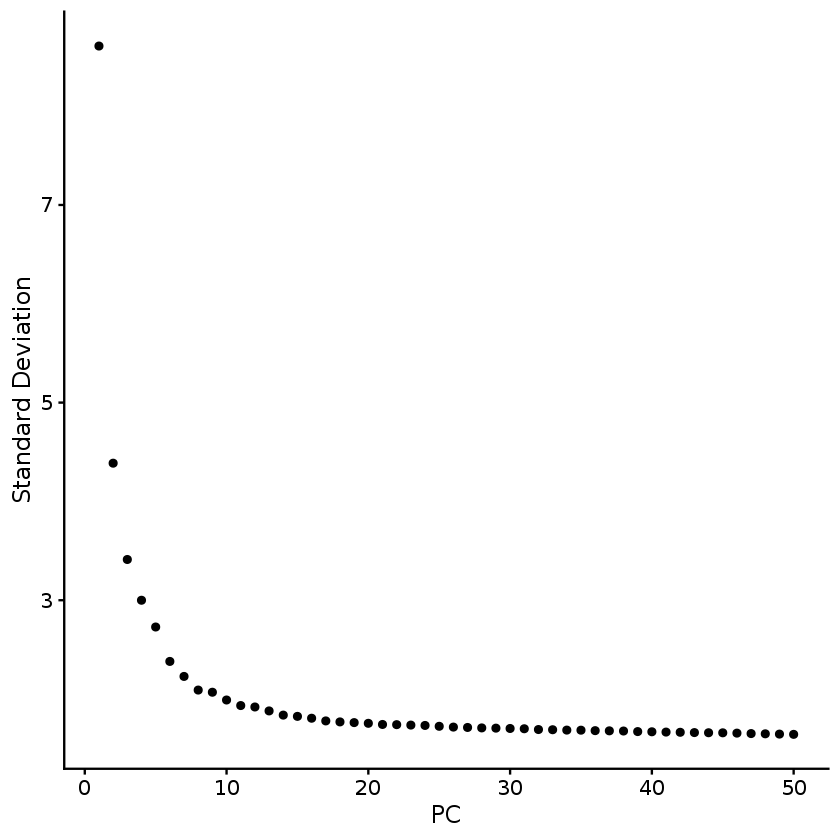

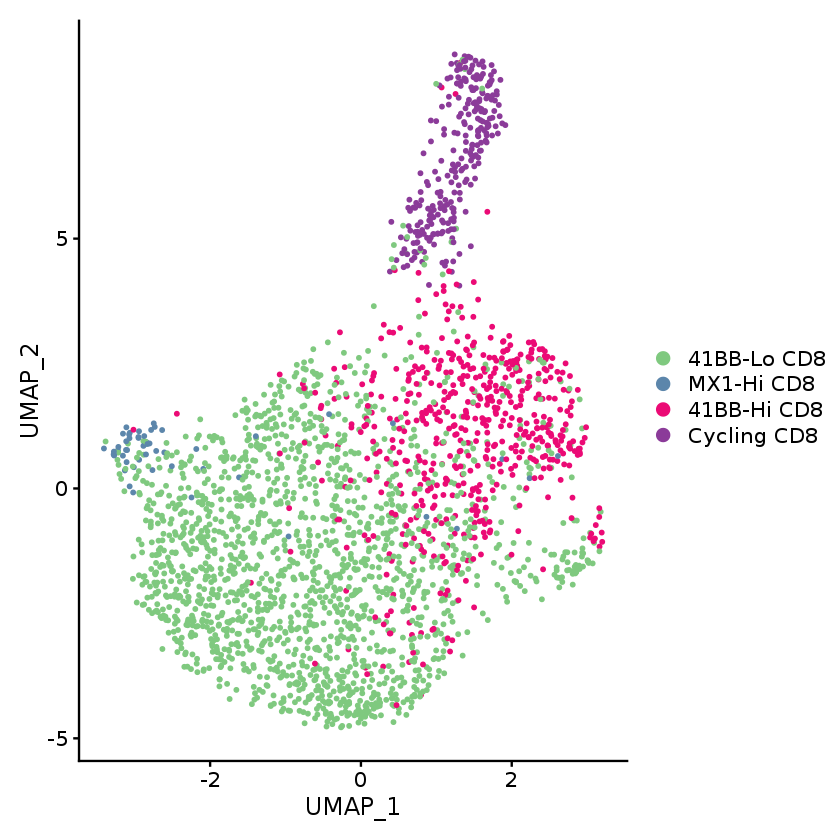

In [20]:
p915 <- subset(cd8_seurobj, idents = c("p915"))

p915 <- FindVariableFeatures(p915, selection.method = "vst")
top10 <- head(VariableFeatures(p915), 10)
all.genes <- rownames(p915)
p915 <- ScaleData(p915, features = all.genes)
p915 <- RunPCA(p915, features = VariableFeatures(object = p915), npcs = 60)
ElbowPlot(p915,ndims = 50)
p915 <- RunUMAP(p915, dims = 1:30)
DimPlot(p915, group.by = "FinalCellType", cols = umap_cols)

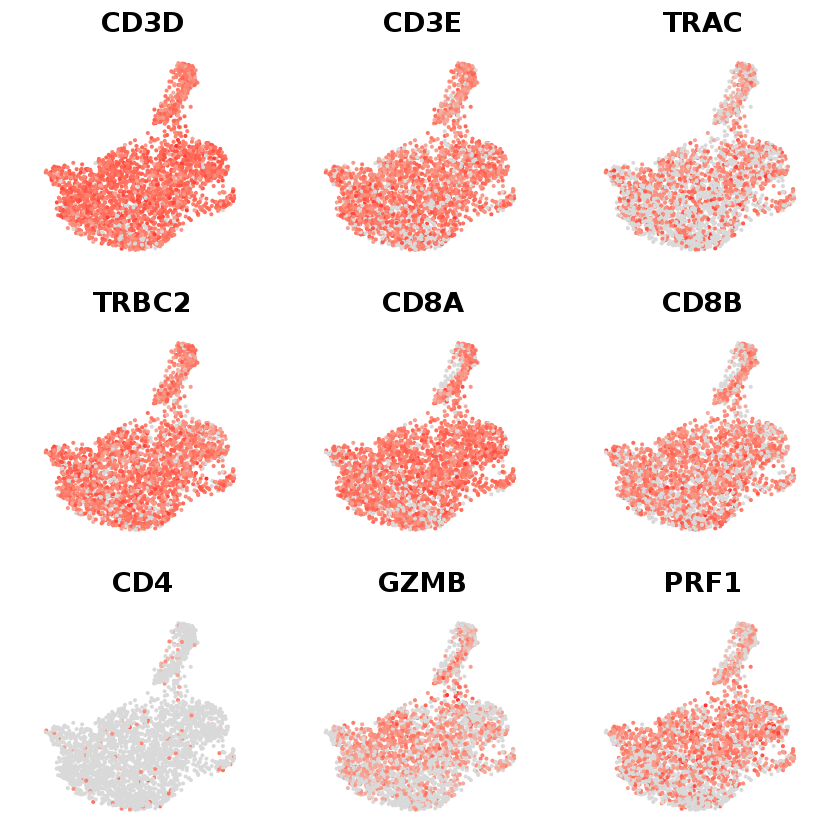

In [21]:
DefaultAssay(p915) <- "RNA"
p <- FeaturePlot(p915, c("CD3D","CD3E","TRAC","TRBC2","CD8A","CD8B","CD4","GZMB","PRF1"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

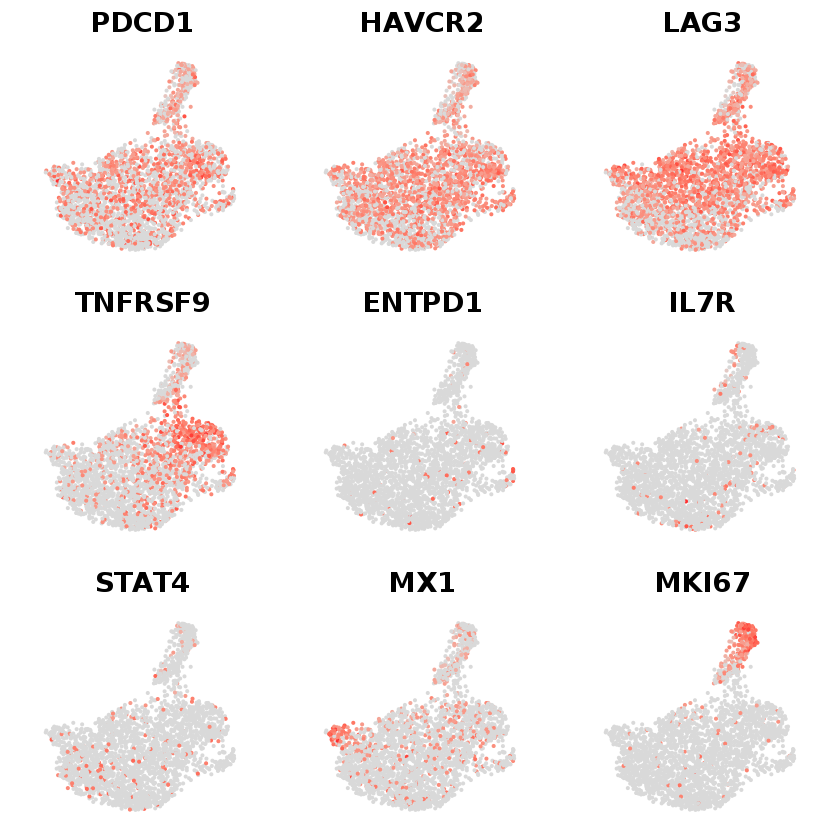

In [22]:
DefaultAssay(p915) <- "RNA"
p <- FeaturePlot(p915, c("PDCD1","HAVCR2","LAG3","TNFRSF9","ENTPD1","IL7R","STAT4","MX1","MKI67"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

In [23]:
umap <- DimPlot(p915, group.by = "FinalCellType", cols = umap_cols, pt.size = 0.4) + NoLegend()

cd3d <- FeaturePlot(p915, c("CD3D"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd8b <- FeaturePlot(p915, c("CD8B"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd4 <- FeaturePlot(p915, c("CD4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd69 <- FeaturePlot(p915, c("CD69"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdcd1 <- FeaturePlot(p915, c("PDCD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
havcr2 <- FeaturePlot(p915, c("HAVCR2"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
lag3 <- FeaturePlot(p915, c("LAG3"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
tnfrsf9 <- FeaturePlot(p915, c("TNFRSF9"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
entpd1 <- FeaturePlot(p915, c("ENTPD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
il7r <- FeaturePlot(p915, c("IL7R"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
stat4 <- FeaturePlot(p915, c("STAT4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mx1 <- FeaturePlot(p915, c("MX1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mki67 <- FeaturePlot(p915, c("MKI67"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdf("p915_RNA_UMAP_Integrated_ClusterMetadata.pdf", useDingbats = F, width = 15, height = 5)
ggarrange(umap, cd3d, cd8b, cd4, cd69, tnfrsf9, pdcd1, havcr2, lag3, entpd1, il7r, stat4, mx1, mki67, nrow = 2, ncol = 7)
dev.off()

png 
  2

Centering and scaling data matrix
PC_ 1 
Positive:  BIRC5, UBE2C, PCLAF, TOP2A, MYBL2, MKI67, CKS1B, CENPA, CCNB1, TYMS 
	   AURKB, CCNB2, CCNA2, CDC20, DLGAP5, EAF2, GGH, CDK1, CDCA5, CDKN3 
	   HMGB3, GTSE1, MND1, MXD3, CEP55, KIFC1, CDCA3, SHCBP1, PBK, STMN1 
Negative:  CCL4, IL32, JUN, PRMT9, IL7R, MT-ND2, SAT1, DNAJB1, FTL, MT-TV 
	   ZNF331, UVSSA, AP005482.1, CD7, DDX39B, AC129492.1, MXI1, BTG2, SESN1, KIFAP3 
	   TRGV10, AC025181.2, AL162377.1, LTB, TRDC, AP001160.1, YIPF1, RTP5, INTS4, TXK 
PC_ 2 
Positive:  AL133467.1, GAS6, PNOC, PYCR1, TXNDC5, RPP25, JCHAIN, TNFRSF17, MZB1, C19orf38 
	   FCGR2B, SLC17A9, TNFRSF13B, BTK, GPT2, POU2AF1, AL928768.3, IGKC, TLE1, MYDGF 
	   CTSH, CD180, SLC19A1, NANS, MEF2C, AC012236.1, NT5DC2, SRM, FKBP11, PARM1 
Negative:  CCNA2, KIF11, UBE2C, STMN1, MXD3, AURKB, TOP2A, DEPDC1B, CDK1, CENPA 
	   SGO1, SKA3, TPX2, ANLN, HMMR, KIF23, PKMYT1, ORC1, FAM83D, NUSAP1 
	   CDCA8, CLSPN, SKA1, PRC1, RRM2, C21orf58, PCLAF, EZH2, CDKN3, RAD51AP1 
PC_ 3 


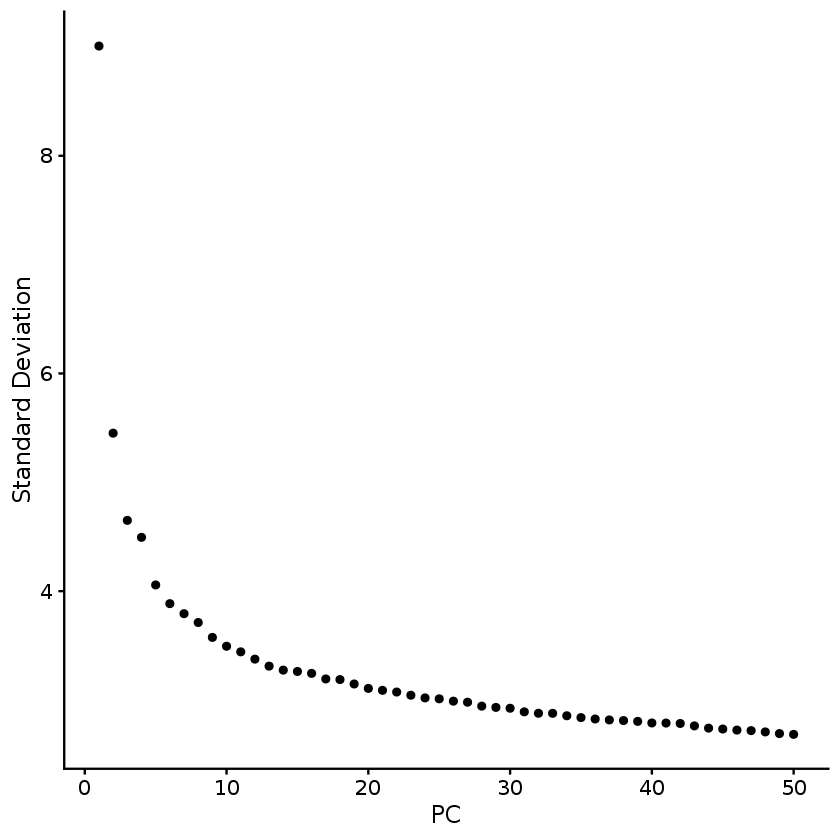

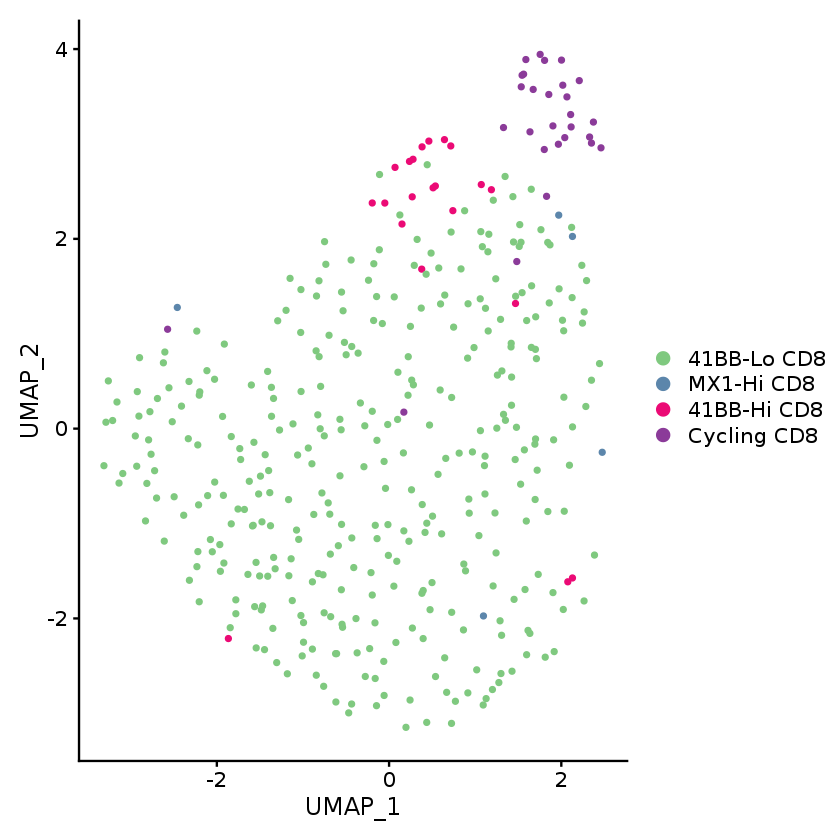

In [24]:
p913 <- subset(cd8_seurobj, idents = c("p913"))

p913 <- FindVariableFeatures(p913, selection.method = "vst")
top10 <- head(VariableFeatures(p913), 10)
all.genes <- rownames(p913)
p913 <- ScaleData(p913, features = all.genes)
p913 <- RunPCA(p913, features = VariableFeatures(object = p913), npcs = 60)
ElbowPlot(p913,ndims = 50)
p913 <- RunUMAP(p913, dims = 1:30)
DimPlot(p913, group.by = "FinalCellType", cols = umap_cols)

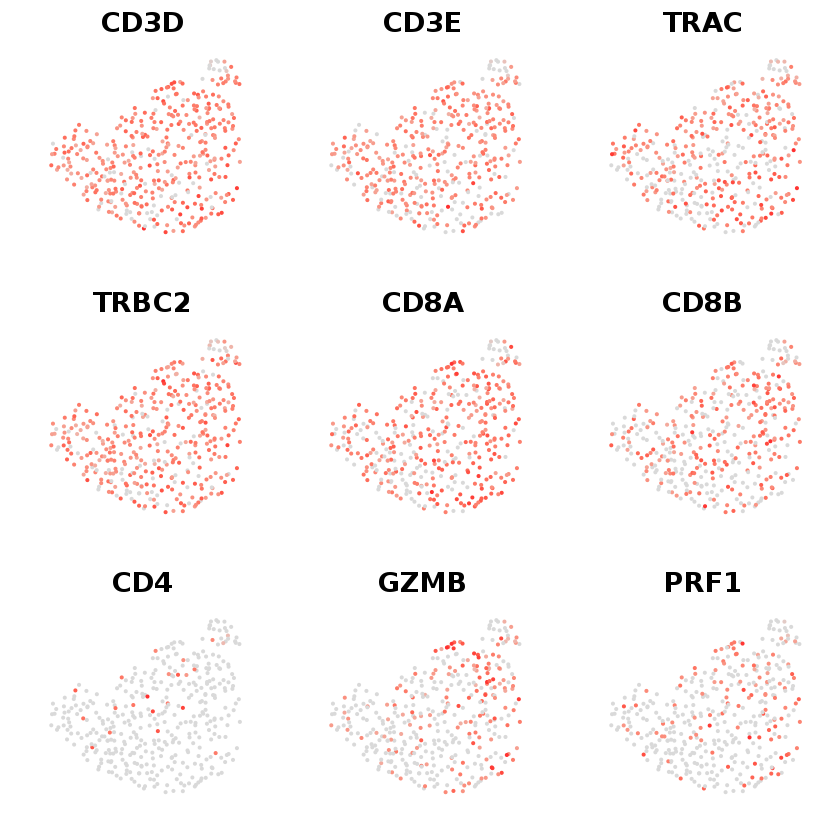

In [25]:
DefaultAssay(p913) <- "RNA"
p <- FeaturePlot(p913, c("CD3D","CD3E","TRAC","TRBC2","CD8A","CD8B","CD4","GZMB","PRF1"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

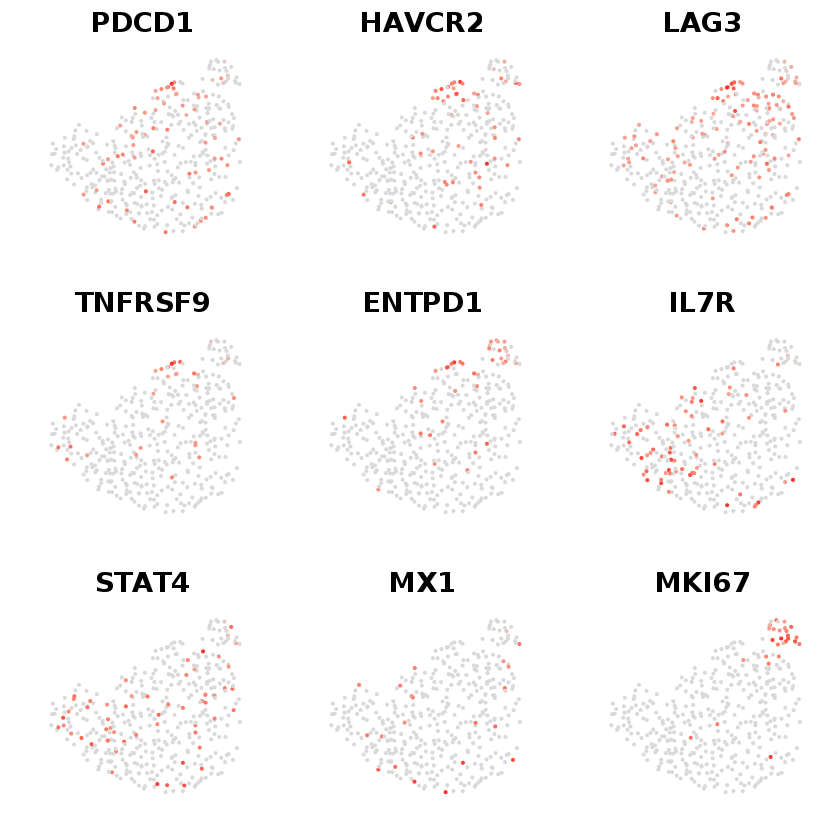

In [26]:
DefaultAssay(p913) <- "RNA"
p <- FeaturePlot(p913, c("PDCD1","HAVCR2","LAG3","TNFRSF9","ENTPD1","IL7R","STAT4","MX1","MKI67"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

In [27]:
umap <- DimPlot(p913, group.by = "FinalCellType", cols = umap_cols, pt.size = 0.4) + NoLegend()

cd3d <- FeaturePlot(p913, c("CD3D"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd8b <- FeaturePlot(p913, c("CD8B"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd4 <- FeaturePlot(p913, c("CD4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd69 <- FeaturePlot(p913, c("CD69"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdcd1 <- FeaturePlot(p913, c("PDCD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
havcr2 <- FeaturePlot(p913, c("HAVCR2"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
lag3 <- FeaturePlot(p913, c("LAG3"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
tnfrsf9 <- FeaturePlot(p913, c("TNFRSF9"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
entpd1 <- FeaturePlot(p913, c("ENTPD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
il7r <- FeaturePlot(p913, c("IL7R"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
stat4 <- FeaturePlot(p913, c("STAT4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mx1 <- FeaturePlot(p913, c("MX1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mki67 <- FeaturePlot(p913, c("MKI67"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdf("p913_RNA_UMAP_Integrated_ClusterMetadata.pdf", useDingbats = F, width = 15, height = 5)
ggarrange(umap, cd3d, cd8b, cd4, cd69, tnfrsf9, pdcd1, havcr2, lag3, entpd1, il7r, stat4, mx1, mki67, nrow = 2, ncol = 7)
dev.off()

png 
  2

Centering and scaling data matrix
PC_ 1 
Positive:  TMSB4X, S100A4, LTB, IGKC, ISG15, NKG7, MX1, GZMH, CCL4, TRGC2 
	   ISG20, IFI6, IFIT3, TRIM22, HBB, LY6E, JUN, FOS, IFI44, LAG3 
	   IFI44L, OAS1, CTSW, ZNF276, CLIC3, EPSTI1, AP5M1, RSAD2, PIK3IP1, SELL 
Negative:  RP11-14N7.2, BIRC5, CENPF, RRM2, GMNN, TK1, TPX2, TOP2A, PCLAF, FOXM1 
	   UBE2C, PLEKHG3, MAD2L1, UBE2T, DSEL, BEX1, CDCA5, CDKN3, HMGB3, TMEM54 
	   SPDL1, CENPA, CAVIN3, KNSTRN, ADAM9, CKS2, NEK2, KIF2C, SALL1, DZIP1 
PC_ 2 
Positive:  ASPM, DLGAP5, MXD3, UBE2C, PLK1, FAM83D, CCNB2, BUB1, ASF1B, AURKB 
	   PIF1, MKI67, MND1, CENPE, NUF2, SPC25, SKA3, KIF20B, MIR181A1HG, AC091057.6 
	   SGO1, CCNB1, CENPW, CDCA2, HIST1H1B, SGO2, FBXO5, HJURP, GTSE1, CDCA8 
Negative:  KCNK1, AIF1L, KCTD3, ADAM9, RECQL4, NADK2, DZIP1, DSEL, CKAP4, SULF2 
	   EPDR1, ACOT11, CXCL16, PLAU, LINC01320, GOLM1, BEX1, TM4SF4, SALL1, PLEKHG3 
	   FTL, TEAD1, TMEM98, MT-RNR2, SLC39A14, MT-CO1, TMEM54, C19orf54, FADS1, RP11-566K19.6 
PC_ 3 
Positive

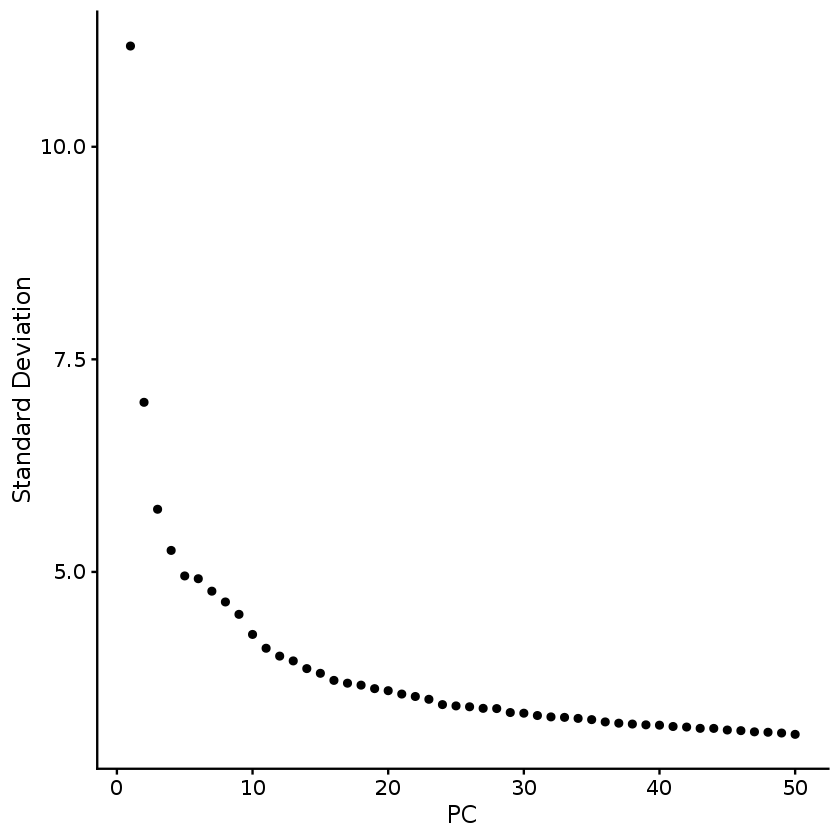

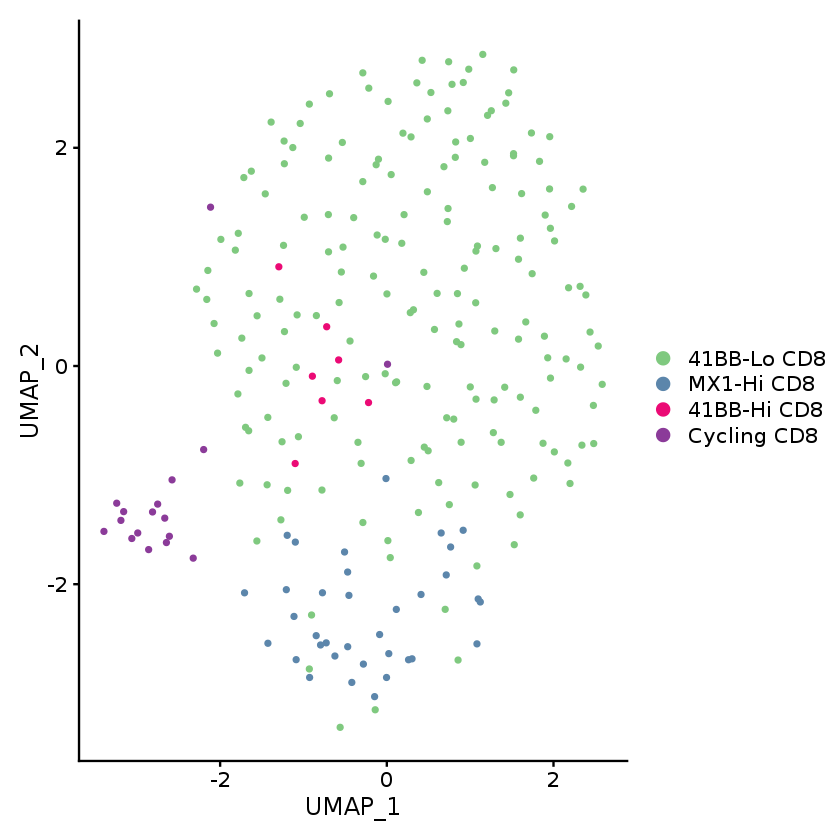

In [28]:
p906 <- subset(cd8_seurobj, idents = c("p906"))

p906 <- FindVariableFeatures(p906, selection.method = "vst")
top10 <- head(VariableFeatures(p906), 10)
all.genes <- rownames(p906)
p906 <- ScaleData(p906, features = all.genes)
p906 <- RunPCA(p906, features = VariableFeatures(object = p906), npcs = 60)
ElbowPlot(p906,ndims = 50)
p906 <- RunUMAP(p906, dims = 1:30)
DimPlot(p906, group.by = "FinalCellType", cols = umap_cols)

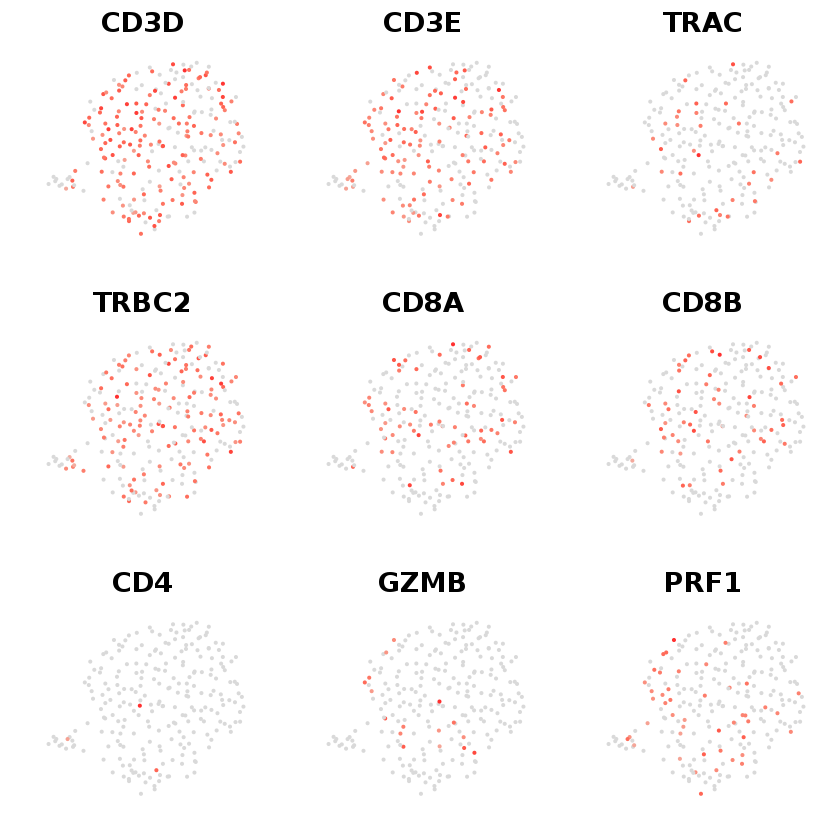

In [29]:
DefaultAssay(p906) <- "RNA"
p <- FeaturePlot(p906, c("CD3D","CD3E","TRAC","TRBC2","CD8A","CD8B","CD4","GZMB","PRF1"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

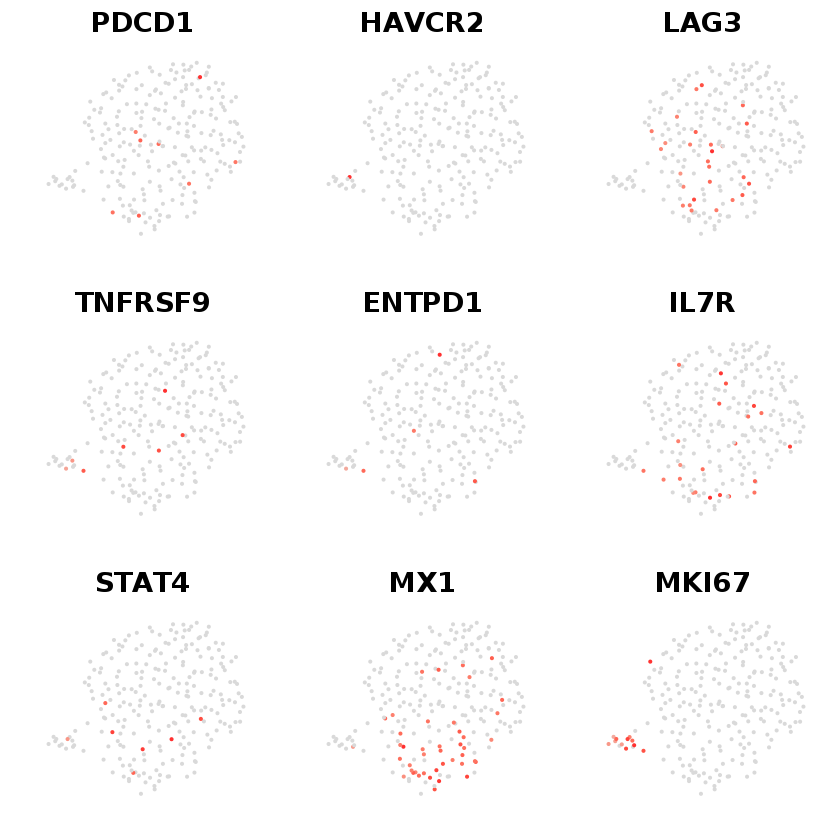

In [30]:
DefaultAssay(p906) <- "RNA"
p <- FeaturePlot(p906, c("PDCD1","HAVCR2","LAG3","TNFRSF9","ENTPD1","IL7R","STAT4","MX1","MKI67"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

In [31]:
umap <- DimPlot(p906, group.by = "FinalCellType", cols = umap_cols, pt.size = 0.4) + NoLegend()

cd3d <- FeaturePlot(p906, c("CD3D"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd8b <- FeaturePlot(p906, c("CD8B"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd4 <- FeaturePlot(p906, c("CD4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd69 <- FeaturePlot(p906, c("CD69"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdcd1 <- FeaturePlot(p906, c("PDCD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
havcr2 <- FeaturePlot(p906, c("HAVCR2"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
lag3 <- FeaturePlot(p906, c("LAG3"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
tnfrsf9 <- FeaturePlot(p906, c("TNFRSF9"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
entpd1 <- FeaturePlot(p906, c("ENTPD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
il7r <- FeaturePlot(p906, c("IL7R"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
stat4 <- FeaturePlot(p906, c("STAT4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mx1 <- FeaturePlot(p906, c("MX1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mki67 <- FeaturePlot(p906, c("MKI67"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdf("p906_RNA_UMAP_Integrated_ClusterMetadata.pdf", useDingbats = F, width = 15, height = 5)
ggarrange(umap, cd3d, cd8b, cd4, cd69, tnfrsf9, pdcd1, havcr2, lag3, entpd1, il7r, stat4, mx1, mki67, nrow = 2, ncol = 7)
dev.off()

png 
  2

Centering and scaling data matrix
PC_ 1 
Positive:  RPS18, CCL4, HBB, MT-ND2, ZFP36, RGS1, CST3, CREM, APOC1, GPX1 
	   RPL3, PDK4, EEF1A1, VMP1, RPS6, B4GALT1, C1QB, HBA2, C1orf56, MT-ND3 
	   NDRG1, AC243829.1, PIK3R1, FTH1, DKK3, CTSD, HNRNPH1, AUTS2, CDC42SE1, FCER1G 
Negative:  BIRC5, MKI67, UBE2C, TOP2A, RRM2, AURKB, PCLAF, TYMS, CDCA5, STMN1 
	   SPC25, ASF1B, ZWINT, GTSE1, CDK1, CCNA2, TUBA1B, NUSAP1, CENPF, CDCA3 
	   ASPM, KIF2C, CENPA, TUBB, CKS1B, RAD51AP1, NUF2, SPC24, HIST1H4C, CCNB2 
PC_ 2 
Positive:  CD74, GINS2, AL391056.1, LINC01943, TMSB10, TNFRSF18, MCM5, FXYD2, RPLP1, TK1 
	   PAQR4, SUB1, CDT1, ENTPD1, HLA-DQA1, RPS2, PKM, GAPDH, PARK7, HLA-DRB1 
	   SNAP47, LTB, HAVCR2, TPI1, E2F1, DUT, BLVRA, BIRC3, PGAM1, FABP5 
Negative:  PLK1, CDC20, TROAP, CCNB1, CCNB2, CENPF, CENPA, FAM72D, ASPM, HMMR 
	   KIF14, KIF2C, CDCA8, GTSE1, SGO1, SGO2, TOP2A, UBE2C, KIF23, AURKA 
	   HMGB3, DLGAP5, BIRC5, KNSTRN, BORA, KIFC1, DEPDC1, PRR11, CDK1, CCNA2 
PC_ 3 
Positive:  CD74, AL3

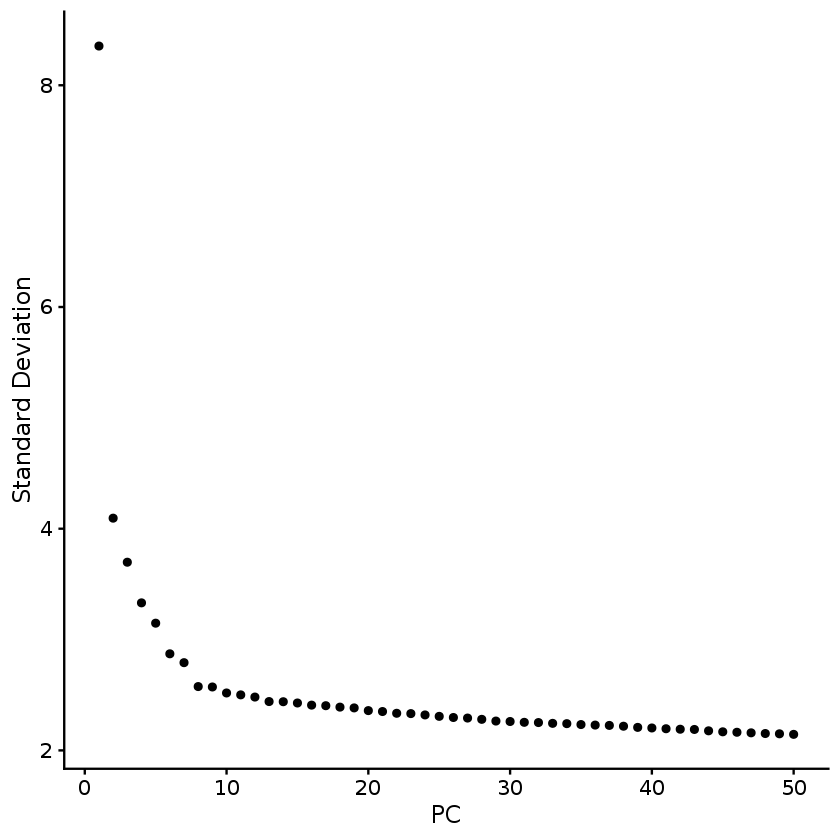

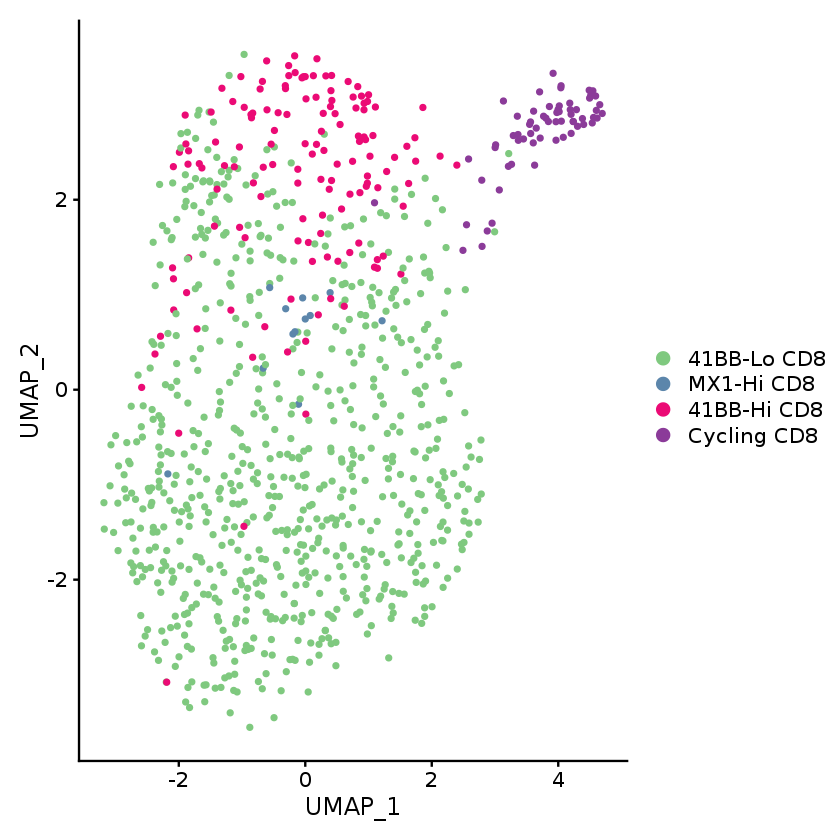

In [32]:
p76 <- subset(cd8_seurobj, idents = c("p76"))

p76 <- FindVariableFeatures(p76, selection.method = "vst")
top10 <- head(VariableFeatures(p76), 10)
all.genes <- rownames(p76)
p76 <- ScaleData(p76, features = all.genes)
p76 <- RunPCA(p76, features = VariableFeatures(object = p76), npcs = 60)
ElbowPlot(p76,ndims = 50)
p76 <- RunUMAP(p76, dims = 1:30)
DimPlot(p76, group.by = "FinalCellType", cols = umap_cols)

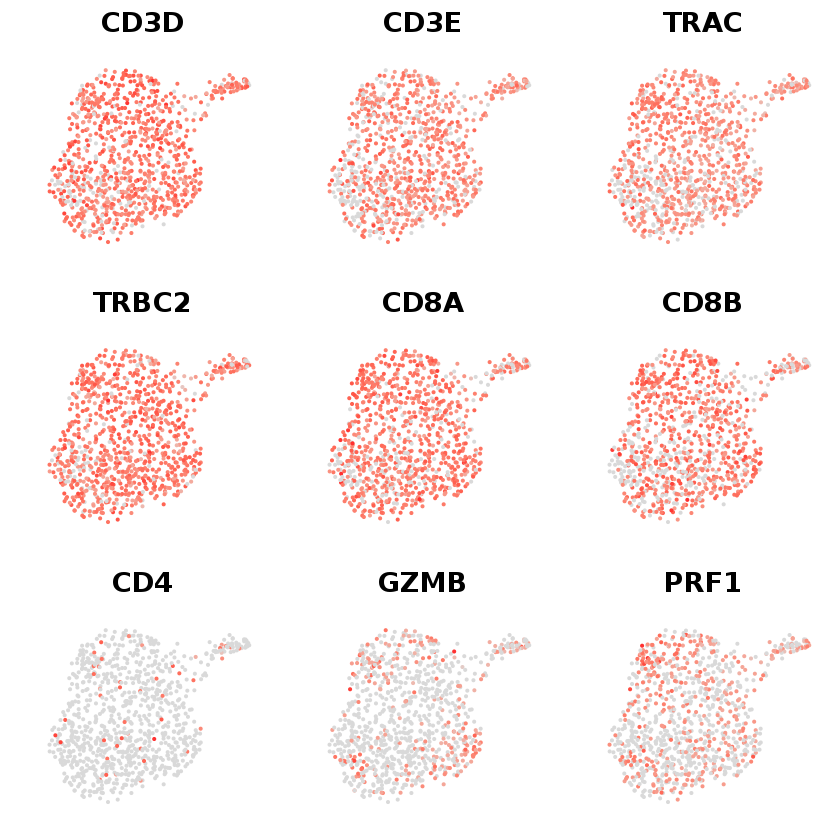

In [33]:
DefaultAssay(p76) <- "RNA"
p <- FeaturePlot(p76, c("CD3D","CD3E","TRAC","TRBC2","CD8A","CD8B","CD4","GZMB","PRF1"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

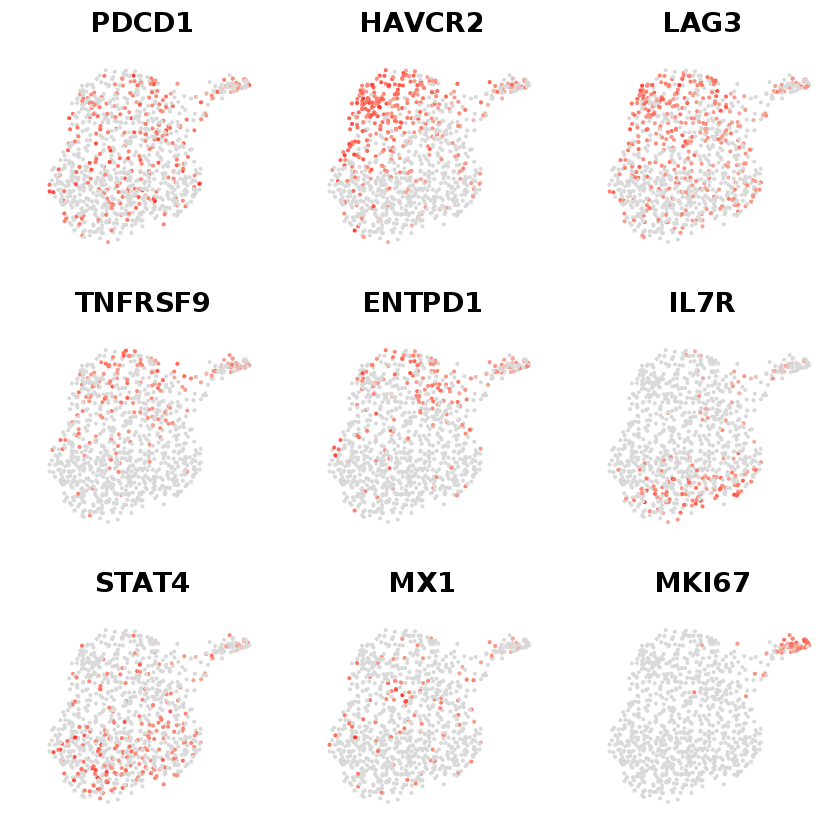

In [34]:
DefaultAssay(p76) <- "RNA"
p <- FeaturePlot(p76, c("PDCD1","HAVCR2","LAG3","TNFRSF9","ENTPD1","IL7R","STAT4","MX1","MKI67"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

In [35]:
umap <- DimPlot(p76, group.by = "FinalCellType", cols = umap_cols, pt.size = 0.4) + NoLegend()

cd3d <- FeaturePlot(p76, c("CD3D"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd8b <- FeaturePlot(p76, c("CD8B"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd4 <- FeaturePlot(p76, c("CD4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd69 <- FeaturePlot(p76, c("CD69"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdcd1 <- FeaturePlot(p76, c("PDCD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
havcr2 <- FeaturePlot(p76, c("HAVCR2"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
lag3 <- FeaturePlot(p76, c("LAG3"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
tnfrsf9 <- FeaturePlot(p76, c("TNFRSF9"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
entpd1 <- FeaturePlot(p76, c("ENTPD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
il7r <- FeaturePlot(p76, c("IL7R"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
stat4 <- FeaturePlot(p76, c("STAT4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mx1 <- FeaturePlot(p76, c("MX1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mki67 <- FeaturePlot(p76, c("MKI67"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdf("p76_RNA_UMAP_Integrated_ClusterMetadata.pdf", useDingbats = F, width = 15, height = 5)
ggarrange(umap, cd3d, cd8b, cd4, cd69, tnfrsf9, pdcd1, havcr2, lag3, entpd1, il7r, stat4, mx1, mki67, nrow = 2, ncol = 7)
dev.off()

png 
  2

Centering and scaling data matrix
PC_ 1 
Positive:  NKG7, FTL, RPS18, RPS2, KLRD1, IGFBP5, GZMB, NDUFA4L2, TSC22D3, CMC1 
	   GZMH, GNLY, PATL2, FGFBP2, CP, RPL7, TRGC2, FCRL6, FABP7, PTGDR 
	   PRF1, CCL4, LINC00685, FGG, TRGC1, RPL36, DUSP2, HBB, MIAT, LYZ 
Negative:  UBE2C, STMN1, TOP2A, BIRC5, MKI67, RRM2, NUSAP1, TYMS, PCLAF, AURKB 
	   H2AFX, CKS1B, SPC25, HIST1H4C, ASF1B, TUBA1B, CCNA2, HMGB2, CDK1, KIFC1 
	   CDCA3, ZWINT, CDKN3, ASPM, TUBB, CENPF, MND1, TUBB4B, CKS2, GTSE1 
PC_ 2 
Positive:  ITM2A, RPLP1, GAPDH, CD74, CD27, GINS2, FABP5, LAG3, COTL1, DUT 
	   GZMK, TK1, TNFRSF9, MIR155HG, CXCL13, ID3, RANBP1, RGS1, PDCD1, PCNA 
	   DHFR, FAM3C, ZBED2, PCLAF, IFNG, PKMYT1, SNAP47, ITM2C, DCTPP1, RFC2 
Negative:  DLGAP5, CCNB2, CDC20, GNLY, CCNB1, CENPF, ASPM, PIMREG, KIF23, GTSE1 
	   FGFBP2, KIF20A, CENPA, NEK2, KPNA2, KNL1, MKI67, TPX2, ARHGAP11A, NUF2 
	   TOP2A, AURKB, HJURP, KLRB1, CKAP2L, PLK1, HMMR, TTK, MXD3, UBE2C 
PC_ 3 
Positive:  CD27, MIR155HG, RGS1, TNFRSF9, LAG3,

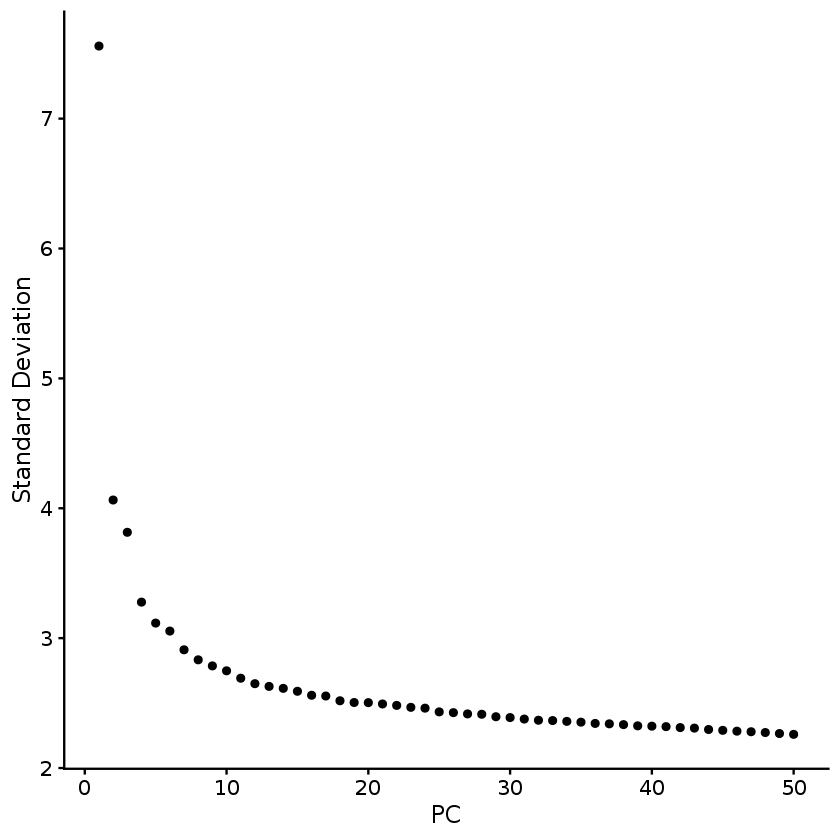

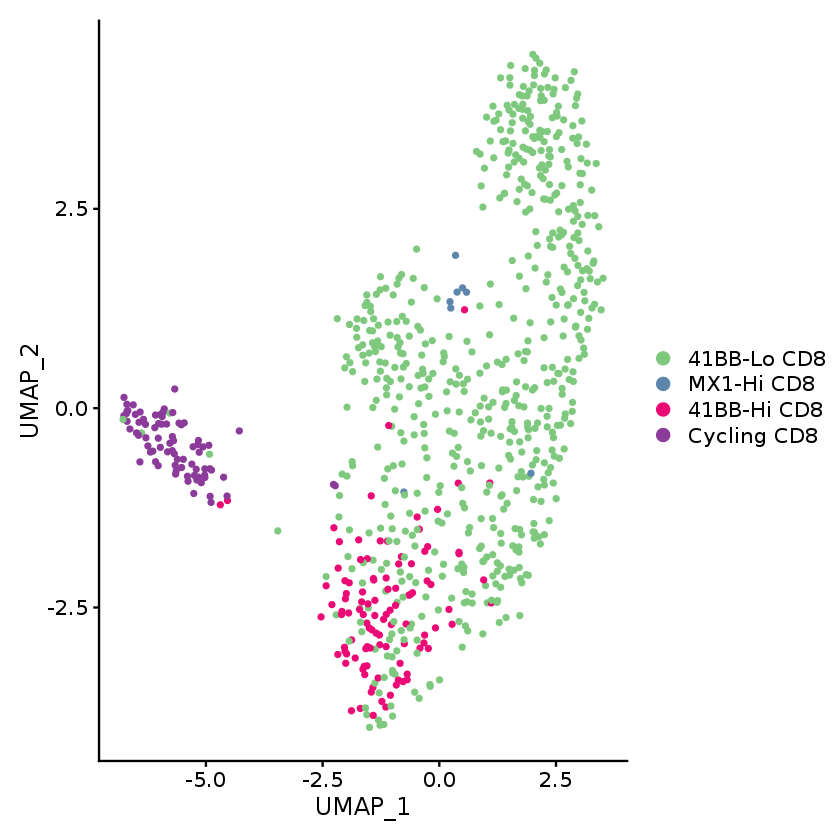

In [36]:
p90 <- subset(cd8_seurobj, idents = c("p90"))

p90 <- FindVariableFeatures(p90, selection.method = "vst")
top10 <- head(VariableFeatures(p90), 10)
all.genes <- rownames(p90)
p90 <- ScaleData(p90, features = all.genes)
p90 <- RunPCA(p90, features = VariableFeatures(object = p90), npcs = 60)
ElbowPlot(p90,ndims = 50)
p90 <- RunUMAP(p90, dims = 1:30)
DimPlot(p90, group.by = "FinalCellType", cols = umap_cols)

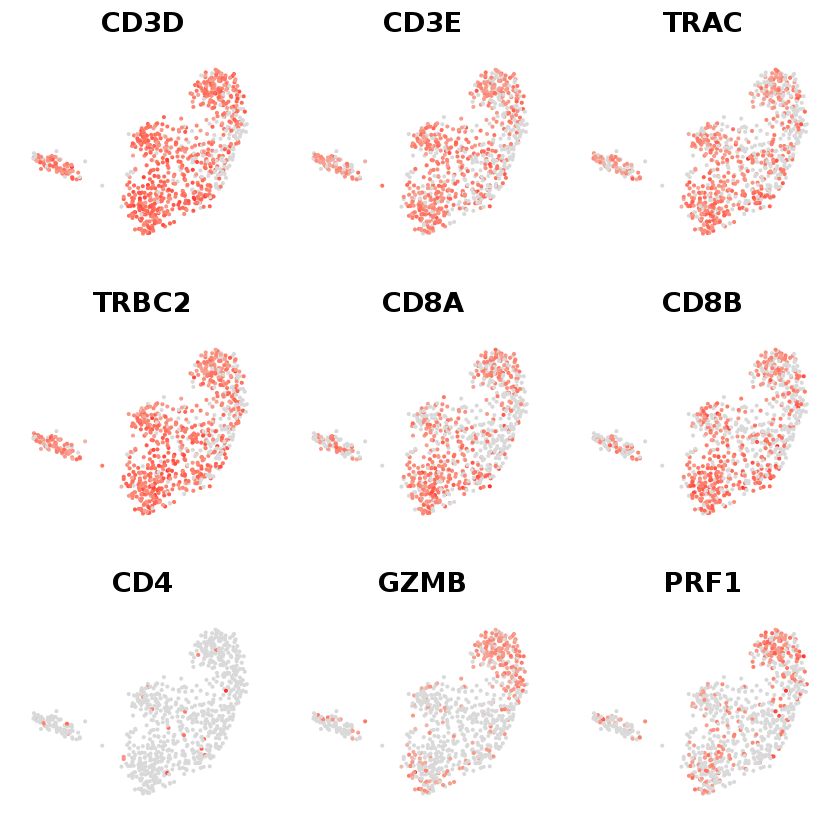

In [37]:
DefaultAssay(p90) <- "RNA"
p <- FeaturePlot(p90, c("CD3D","CD3E","TRAC","TRBC2","CD8A","CD8B","CD4","GZMB","PRF1"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

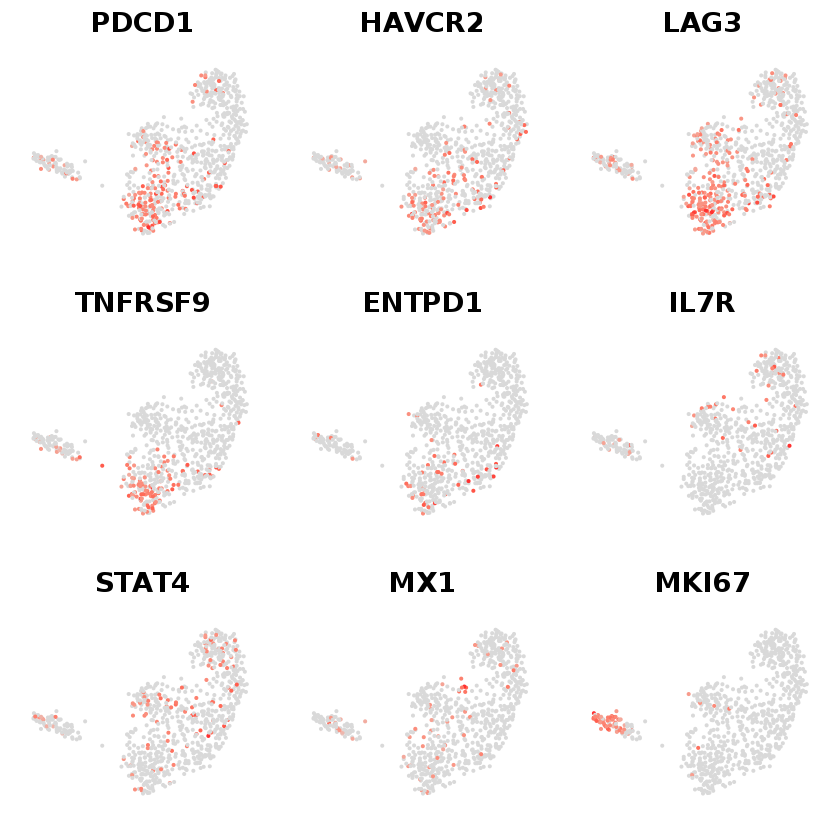

In [38]:
DefaultAssay(p90) <- "RNA"
p <- FeaturePlot(p90, c("PDCD1","HAVCR2","LAG3","TNFRSF9","ENTPD1","IL7R","STAT4","MX1","MKI67"), pt.size = 0.1, min.cutoff = 0, combine = F, order = F, cols = c("grey85","firebrick1"))

for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + NoAxes() 
}

cowplot::plot_grid(plotlist = p)

In [39]:
umap <- DimPlot(p90, group.by = "FinalCellType", cols = umap_cols, pt.size = 0.4) + NoLegend()

cd3d <- FeaturePlot(p90, c("CD3D"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd8b <- FeaturePlot(p90, c("CD8B"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd4 <- FeaturePlot(p90, c("CD4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
cd69 <- FeaturePlot(p90, c("CD69"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdcd1 <- FeaturePlot(p90, c("PDCD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
havcr2 <- FeaturePlot(p90, c("HAVCR2"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
lag3 <- FeaturePlot(p90, c("LAG3"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
tnfrsf9 <- FeaturePlot(p90, c("TNFRSF9"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
entpd1 <- FeaturePlot(p90, c("ENTPD1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
il7r <- FeaturePlot(p90, c("IL7R"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
stat4 <- FeaturePlot(p90, c("STAT4"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mx1 <- FeaturePlot(p90, c("MX1"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()
mki67 <- FeaturePlot(p90, c("MKI67"), pt.size = 0.4, min.cutoff = 0, order = F, cols = c("grey85","firebrick1")) + NoLegend()

pdf("p90_RNA_UMAP_Integrated_ClusterMetadata.pdf", useDingbats = F, width = 15, height = 5)
ggarrange(umap, cd3d, cd8b, cd4, cd69, tnfrsf9, pdcd1, havcr2, lag3, entpd1, il7r, stat4, mx1, mki67, nrow = 2, ncol = 7)
dev.off()

png 
  2